In [ ]:
Udacity Deep Learning Assignment 1.
Humayun Irshad

In [23]:
from __future__ import print_function
import os
import sys
import time
import glob
import random
import tarfile
import imageio
import numpy as np
from math import sqrt
#from PIL import Image
from sklearn import metrics
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
from IPython.display import display, Image
from six.moves.urllib.request import urlretrieve
from sklearn.linear_model import LogisticRegression

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [2]:
url = 'https://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
#data_root = '/Users/hirshad/Documents/Udacity/Assignment_1/'  # Change me to store data elsewhere
data_root = '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/'

def download_progress_hook(count, blockSize, totalSize):
    """A hook to report the progress of a download. This is mostly intended for users with
    slow internet connections. Reports every 5% change in download progress.
    """
    global last_percent_reported
    percent = int(count * blockSize * 100 / totalSize)

    if last_percent_reported != percent:
        if percent % 5 == 0:
            sys.stdout.write("%s%%" % percent)
            sys.stdout.flush()
        else:
            sys.stdout.write(".")
            sys.stdout.flush()

        last_percent_reported = percent

def maybe_download(filename, expected_bytes, force=False):
    """Download a file if not present, and make sure it's the right size."""
    dest_filename = os.path.join(data_root, filename)
    if force or not os.path.exists(dest_filename):
        print('Attempting to download:', filename)
        filename, _ = urlretrieve(url + filename, dest_filename, reporthook=download_progress_hook)
        print('\nDownload Complete!')
    statinfo = os.stat(dest_filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified', dest_filename)
    else:
        raise Exception(
            'Failed to verify ' + dest_filename + '. Can you get to it with a browser?')
    return dest_filename


train_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
test_filename = maybe_download('notMNIST_small.tar.gz', 8458043)



Found and verified /Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large.tar.gz
Found and verified /Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small.tar.gz


In [24]:
num_classes = 10
np.random.seed(133)

def maybe_extract(filename, force=False):
    root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
    if os.path.isdir(root) and not force:
        # You may override by setting force=True.
        print('%s already present - Skipping extraction of %s.' % (root, filename))
    else:
        print('Extracting data for %s. This may take a while. Please wait.' % root)
        tar = tarfile.open(filename)
        sys.stdout.flush()
        tar.extractall(data_root)
        tar.close()
    data_folders = [
        os.path.join(root, d) for d in sorted(os.listdir(root))
        if os.path.isdir(os.path.join(root, d))]
    if len(data_folders) != num_classes:
        raise Exception(
            'Expected %d folders, one per class. Found %d instead.' % (num_classes, len(data_folders)))
    print(data_folders)
    return data_folders

train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)



/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large already present - Skipping extraction of /Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large.tar.gz.
['/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/A', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/B', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/C', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/D', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/E', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/F', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/G', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/H', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/I', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/J']
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small already present 

In [25]:
Image(filename=os.path.join(test_folders[0], 'MDEtMDEtMDAudHRm.png'))



In [26]:
display(Image(filename=os.path.join(test_folders[0], 'MDEtMDEtMDAudHRm.png')))


In [27]:
imagenames = glob.glob(os.path.join(test_folders[0],'*.png'))


In [28]:
print(imagenames)

# Display first 10 images of Class Label A
for i in range(10):
    #img = Image.open(imagenames[i])
    #img.show()
    display(Image(filename=imagenames[i]))

['/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small/A/Qml0d2lzZS50dGY=.png', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small/A/RW5nbGFuZCBCb2xkSXRhbGljLnR0Zg==.png', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small/A/R3JlZWsgSXRhbGljLnR0Zg==.png', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small/A/Rmx5d2hlZWxTcXVhcmUudHRm.png', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small/A/SGFuZGljYXAub3Rm.png', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small/A/Q29uY29yZGVCRS1Cb2xkQ24ub3Rm.png', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small/A/QnJpZGdld29ya0EudHRm.png', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small/A/QW5pc2V0dGUtTGlnaHQub3Rm.png', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small/A/RmlnaHQgVGhpcy50dGY=.png', '/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_small/A/QXJyb3dFeHRyYUJvbGQub3

In [29]:

image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
    """Load the data for a single letter label."""
    image_files = os.listdir(folder)
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    print(folder)
    num_images = 0
    for image in image_files:
        image_file = os.path.join(folder, image)
        try:
            image_data = (imageio.imread(image_file).astype(float) -
                          pixel_depth / 2) / pixel_depth
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data
            num_images = num_images + 1
        except (IOError, ValueError) as e:
            print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')

    dataset = dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %
                        (num_images, min_num_images))

    print('Full dataset tensor:', dataset.shape)
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset


def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names = []
    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename) and not force:
            # You may override by setting force=True.
            print('%s already present - Skipping pickling.' % set_filename)
        else:
            print('Pickling %s.' % set_filename)
            dataset = load_letter(folder, min_num_images_per_class)
            try:
                with open(set_filename, 'wb') as f:
                    pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':', e)

    return dataset_names


train_datasets = maybe_pickle(train_folders, 45000)
test_datasets = maybe_pickle(test_folders, 1800)


/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/A.pickle already present - Skipping pickling.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/B.pickle already present - Skipping pickling.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/C.pickle already present - Skipping pickling.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/D.pickle already present - Skipping pickling.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/E.pickle already present - Skipping pickling.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/F.pickle already present - Skipping pickling.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/G.pickle already present - Skipping pickling.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/H.pickle already present - Skipping pickling.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/I.pickle already pre

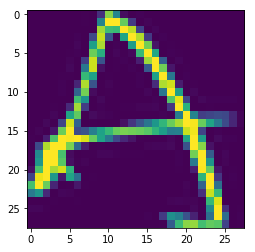

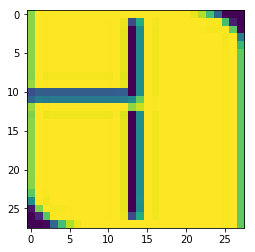

In [30]:

database_name = open(train_datasets[0],'r')
dataset = pickle.load(database_name)
# extract a 2D slice of first instances in database
im = dataset[0,:,:]
imgplot = plt.imshow(im)
# pick a random instance from database and show it.
random_index = np.random.randint(len(dataset))
im = dataset[random_index,:,:]
plt.figure()
plt.imshow(im)


In [31]:

instances_per_class = list()
for file in train_datasets:
    print(file)
    database_name = open(file,'r')
    dataset = pickle.load(database_name)
    instances_per_class.append(dataset.shape[0])
    print('Database ' + str(file) + ' have ' + str(dataset.shape[0]) + ' images.')
print('Total Instances: ' + str(sum(instances_per_class)))
print('Mean Instances per Class: ' + str(sum(instances_per_class)/float(len(instances_per_class))))

num_items = len(instances_per_class)
mean = sum(instances_per_class) / num_items
differences = [x - mean for x in instances_per_class]
sq_differences = [d ** 2 for d in differences]
ssd = sum(sq_differences)
variance = ssd / num_items
sd = sqrt(variance)

print('The mean of {} is {}.'.format(instances_per_class, mean))
print('The differences are {}.'.format(differences))
print('The sum of squared differences is {}.'.format(ssd))
print('The variance is {}.'.format(variance))
print('The standard deviation is {}.'.format(sd))
print('--------------------------')


/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/A.pickle
Database /Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/A.pickle have 52909 images.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/B.pickle
Database /Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/B.pickle have 52911 images.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/C.pickle
Database /Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/C.pickle have 52912 images.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/D.pickle
Database /Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/D.pickle have 52911 images.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/E.pickle
Database /Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/E.pickle have 52912 images.
/Users/hirshad/PycharmProjects/Udacity_Assignement_1/notMNIST_large/F.pickle
Database /Use

In [32]:

def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
        labels = np.ndarray(nb_rows, dtype=np.int32)
    else:
        dataset, labels = None, None
    return dataset, labels


def merge_datasets(pickle_files, train_size, valid_size=0):
    num_classes = len(pickle_files)
    valid_dataset, valid_labels = make_arrays(valid_size, image_size)
    train_dataset, train_labels = make_arrays(train_size, image_size)
    vsize_per_class = valid_size // num_classes
    tsize_per_class = train_size // num_classes

    start_v, start_t = 0, 0
    end_v, end_t = vsize_per_class, tsize_per_class
    end_l = vsize_per_class + tsize_per_class
    for label, pickle_file in enumerate(pickle_files):
        try:
            with open(pickle_file, 'rb') as f:
                letter_set = pickle.load(f)
                # let's shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter = letter_set[:vsize_per_class, :, :]
                    valid_dataset[start_v:end_v, :, :] = valid_letter
                    valid_labels[start_v:end_v] = label
                    start_v += vsize_per_class
                    end_v += vsize_per_class

                train_letter = letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, :, :] = train_letter
                train_labels[start_t:end_t] = label
                start_t += tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('Unable to process data from', pickle_file, ':', e)
            raise

    return valid_dataset, valid_labels, train_dataset, train_labels


train_size = 200000
valid_size = 10000
test_size = 10000

valid_dataset, valid_labels, train_dataset, train_labels = merge_datasets(
    train_datasets, train_size, valid_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Validation:', valid_dataset.shape, valid_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)


Training: (200000, 28, 28) (200000,)
Validation: (10000, 28, 28) (10000,)
Testing: (10000, 28, 28) (10000,)


In [33]:

def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels = randomize(test_dataset, test_labels)
valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

def ShowRandomImages(dataset, labels, n):
    indices = random.sample(range(0,labels.shape[0]),n)
    fig = plt.figure()
    for i in range(n):
        a = fig.add_subplot(1, n, i+1)
        plt.imshow(dataset[indices[i],:,:])
        a.set_title(chr(labels[indices[i]]+ord('A')))
        a.axes.get_xaxis().set_visible(False)
        a.axes.get_xaxis().set_visible(False)
    plt.show()

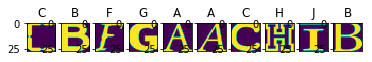

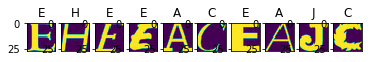

[ 100.   94.   98.  116.  106.   80.   96.  123.  102.   85.]
[  94.   89.  111.   91.   98.  102.   98.  107.   98.  112.]
[ 114.   95.   97.  105.   94.  101.  106.  110.   92.   86.]


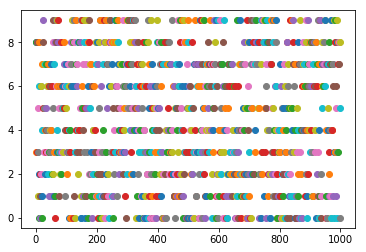

In [22]:
### Problem 4.
# Convince yourself that the data is still good after shuffling!

ShowRandomImages(train_dataset, train_labels, 10)
ShowRandomImages(test_dataset, test_labels, 10)


# I count the number of each class labels in first 1K image and compare with all class labels (in training, validation
# and test sets). I also draw plot a graph of first 1K instances of training set belong to different class to confirm
# equally distributed.

tr_count = np.zeros(10)
va_count = np.zeros(10)
te_count = np.zeros(10)
for i in range(1000):
    tr_count[train_labels[i]] = tr_count[train_labels[i]] + 1
    va_count[valid_labels[i]] = va_count[valid_labels[i]] + 1
    te_count[test_labels[i]] = te_count[test_labels[i]] + 1
    plt.plot(i,train_labels[i],"-o")
print(str(tr_count))
print(str(va_count))
print(str(te_count))


In [34]:

pickle_file = os.path.join(data_root, 'notMNIST.pickle')

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': train_dataset,
    'train_labels': train_labels,
    'valid_dataset': valid_dataset,
    'valid_labels': valid_labels,
    'test_dataset': test_dataset,
    'test_labels': test_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 690800441


In [35]:

def check_overlap(set1, set2):
    set1.flags.writeable=False
    set2.flags.writeable=False
    start = time.clock()
    hash1 = set([hash(img1.data) for img1 in set1])
    hash2 = set([hash(img2.data) for img2 in set2])
    all_overlap = set.intersection(hash1, hash2)
    return all_overlap, time.clock()-start

r, execTime = check_overlap(train_dataset, test_dataset)
print('Number of overlaps between Training and Test sets: {}. Execution time: {}.'.format(len(r),execTime))

r, execTime = check_overlap(train_dataset, valid_dataset)
print('Number of overlaps between Training and Validation sets: {}. Execution time: {}.'.format(len(r),execTime))

r, execTime = check_overlap(valid_dataset, test_dataset)
print('Number of overlaps between Validation and Test sets: {}. Execution time: {}.'.format(len(r),execTime))


Number of overlaps between Training and Test sets: 1125. Execution time: 0.933007.
Number of overlaps between Training and Validation sets: 941. Execution time: 0.966073.
Number of overlaps between Validation and Test sets: 68. Execution time: 0.088463.


In [18]:

# Prepare the training dataset
samples, width, height = train_dataset.shape
x_train = np.reshape(train_dataset, (samples, width*height))
y_trian = train_labels

# Prepare the test dataset
samples, width, height = test_dataset.shape
x_test = np.reshape(test_dataset, (samples, width*height))
y_test = test_labels

# Prepare the validation dataset
samples, width, height = valid_dataset.shape
x_valid = np.reshape(valid_dataset, (samples, width*height))
y_valid = valid_labels

# Instantiate
lg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, verbose=1, max_iter=1000, n_jobs=-1)

# Fit
lg.fit(x_train, y_trian)

# Predict
y_pred = lg.predict(x_test)

# Score
metrics.accuracy_score(y_test, y_pred)

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 10.5min finished


0.89590000000000003

In [37]:
### Train on different set of instances
train_sizes = [50, 500, 5000, train_dataset.shape[0]]
for N in train_sizes:
    print('\n Training on %d examples' % N)
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=10)
    model.fit(x_train[:N], train_labels[:N])
    y_perd = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f%%' % (acc * 100.0))
    error_rate = metrics.zero_one_loss(y_test, y_pred)
    print('Error Rate: %.2f%%' % (error_rate*100.0))


 Training on 50 examples
Accuracy: 89.59%
Error Rate: 10.41%

 Training on 500 examples
Accuracy: 89.59%
Error Rate: 10.41%

 Training on 5000 examples
Accuracy: 89.59%
Error Rate: 10.41%

 Training on 200000 examples
Accuracy: 89.59%
Error Rate: 10.41%
